In [63]:
pip install networkx matplotlib

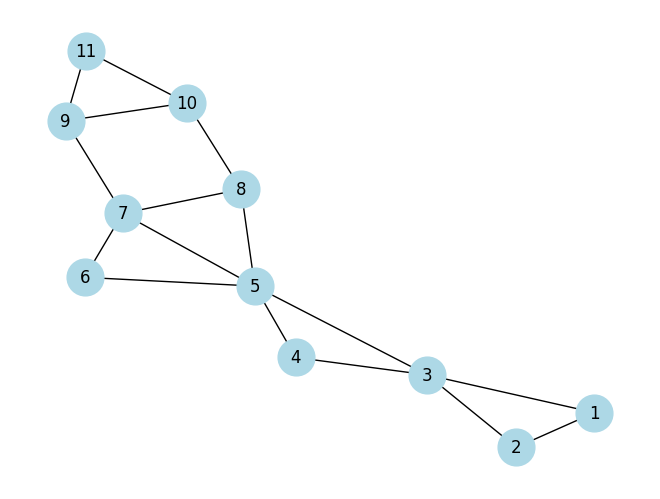

In [95]:
import networkx as nx
import matplotlib.pyplot as plt

# Criar um grafo não direcionado
G = nx.Graph()

# Adicionar nós (usuários)
usuarios = range(1, 11)  # 15 usuários para simplicidade
G.add_nodes_from(usuarios)

# Adicionar arestas (relacionamentos)
relacionamentos = [(1, 2), (1, 3), (2, 3), (3, 4),(3,5), (4, 5), (5, 6), (5, 7),(5,8), (6, 7), (7, 8), (7,9), (8, 10), (9, 10),(9,11),(10,11)]
G.add_edges_from(relacionamentos)

# Desenhar o grafo
nx.draw(G, with_labels=True, node_color='lightblue', node_size=700)
plt.show()

In [91]:
# Imprimir o número de conexões (grau) para cada usuário
print("Grau de cada nó (usuário):")
for usuario in G.nodes:
    print(f"Usuário {usuario} tem {G.degree(usuario)} conexões")

# Encontrar o caminho mais curto entre dois usuários
print("\nCaminho mais curto entre o usuário 1 e 10:")
caminho = nx.shortest_path(G, source=1, target=10)
print(caminho)

# Calcular a centralidade de intermediação
print("\nCentralidade de intermediação:")
centrality = nx.betweenness_centrality(G)
for node, val in centrality.items():
    print(f"Usuário {node}: {val:.2f}")

Grau de cada nó (usuário):
Usuário 1 tem 2 conexões
Usuário 2 tem 2 conexões
Usuário 3 tem 4 conexões
Usuário 4 tem 2 conexões
Usuário 5 tem 5 conexões
Usuário 6 tem 2 conexões
Usuário 7 tem 4 conexões
Usuário 8 tem 3 conexões
Usuário 9 tem 2 conexões
Usuário 10 tem 3 conexões
Usuário 11 tem 1 conexões

Caminho mais curto entre o usuário 1 e 10:
[1, 3, 5, 8, 10]

Centralidade de intermediação:
Usuário 1: 0.00
Usuário 2: 0.00
Usuário 3: 0.36
Usuário 4: 0.00
Usuário 5: 0.56
Usuário 6: 0.00
Usuário 7: 0.19
Usuário 8: 0.27
Usuário 9: 0.04
Usuário 10: 0.21
Usuário 11: 0.00


In [93]:
import pandas as pd

# Supondo que o grafo G já foi criado e adicionado com alguns nós e arestas
G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 1), (1, 3), (1, 10)])

# Calcular o grau e a centralidade de intermediação para cada nó
degrees = {node: G.degree(node) for node in G.nodes()}
centrality = nx.betweenness_centrality(G)

# Tentar calcular o caminho mais curto entre o usuário 1 e 10
try:
    shortest_path_length = len(nx.shortest_path(G, source=1, target=10)) - 1
except nx.NetworkXNoPath:
    shortest_path_length = float('inf')  # Infinito, indicando que não há caminho

# Preparar os dados para DataFrame
data = {
    "User": list(G.nodes()),
    "Degree": [degrees[node] for node in G.nodes()],
    "Centrality": [centrality[node] for node in G.nodes()]
}

In [94]:
# Adicionar o caminho mais curto de 1 para 10 como uma coluna, se desejado
data["Shortest Path from 1 to 10"] = [shortest_path_length if node == 10 else None for node in G.nodes()]

# Criar DataFrame
df = pd.DataFrame(data)
print(df)

   User  Degree  Centrality  Shortest Path from 1 to 10
0     1       4        0.55                         NaN
1     2       2        0.00                         NaN
2     3       3        0.20                         NaN
3     4       2        0.05                         NaN
4     5       2        0.10                         NaN
5    10       1        0.00                         1.0
